In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

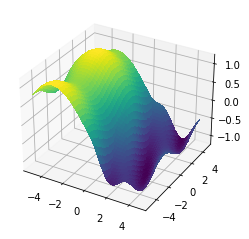

In [27]:
# making a 3D surface with hills and valleys

from matplotlib import cm
from matplotlib.ticker import LinearLocator

# creating wid figure
fig, ax= plt.subplots(subplot_kw={"projection": "3d"})

# make data
x= np.arange(-5, 5, 0.25)
y= np.arange(-5, 5, 0.25)
x, y= np.meshgrid(x,y)

r= np.sqrt(x**2, y**2)
z= 0.2*np.sin(x+y + r) - 1*np.sin(x/2)

# plot the resulting surface
surf= ax.plot_surface(x, y, z, cmap= cm.viridis, linewidth=0, antialiased=False)

plt.show()

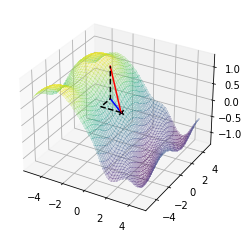

In [24]:
# calculating a simplified gradient using slopes along x and y directions

def compute_z(x, y):
    # calculates any point on the surface
    
    r= np.sqrt(x**2 + y**2)
    z= 0.2*np.sin(x + y + r) - 1*np.sin(x/2)
    
    return z

def plot_pseudo_gradient(x, y):
    # calculates an approx of the gradient using splope calculations of neighboring points offset by
    # a small dx and dy
    
    # comput value at point
    z= compute_z(x, y)
    
    # defining some small distance to traverse
    dx= 0.9
    dy= 0.9
    
    # getting the change in z as a result of the change in x and y
    dzx= (compute_z(x+dx, y) - compute_z(x, y))
    dzy= (compute_z(x, y+dy) - compute_z(x, y))
    
    # calculating the slope along the x and y axis
    # these together tell us the direction of increase
    # and the slope of the current point, so these together are the actual pseudo gradient
    slope_x= dzx/dx
    slope_y= dzy/dy
    
    # scale the vectors for visability
    scale= 7
    
    # calculating the value at the end of the pseudo gradient so we can draw a tangent line along 
    # the surface in the direction of the gradient
    dz= compute_z(x+slope_x*scale, y+slope_y*scale)
    
    xs= [x, x+slope_x*scale]
    ys= [y, y+slope_y*scale]
    zs= [z, z+dz]
    
    # plotting the actual gradient
    ax.plot([xs[0], xs[1]],
            [ys[0], ys[1]],
            [zs[0], zs[0]], 'b')
    
    # plotting the tangent line
    ax.plot(xs, ys, zs, 'r')
    
    # plotting vector components of the tangent line
    ax.plot([xs[0], xs[1], xs[1], xs[1]], 
            [ys[0], ys[0], ys[1], ys[1]], 
            [zs[0], zs[0], zs[0], zs[1]], '--k')
    
    ax.scatter([x], [y], [z], marker='x', c=['k'])
    
    # for later use in traversal with the gradient 
    return slope_x, slope_y
    
    
# creating a figure 
fig, ax= plt.subplots(subplot_kw={'projection': '3d'})
ax.computed_zorder=False # due to bugs in 3D plots

# plot the surface
surf.set_zorder(1)
surf= ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False, alpha=0.2)
surf.set_zorder(1)
    
# plotting the pseudo gradient at (0,0)
plot_pseudo_gradient(0,0)

# rendering
plt.show()

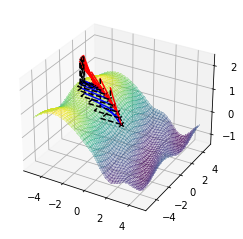

ideal parameters: x=-3.1049518549736064, y=0.789274844799824


In [25]:
# using gradients to iteratively search for the maximum of the surface

# creating a figure
fig, ax= plt.subplots(subplot_kw={"projection": "3d"})
ax.computed_zorder= False

# plot the surface.
surf.set_zorder(1)
surf= ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False, alpha=0.3)
surf.set_zorder(1)

# iteratively following the gradient
x, y= 0, 0

for _ in range(10):
    dx, dy= plot_pseudo_gradient(x, y)
    x, y= x+dx, y+dy

# rendering
plt.show()

# printing result
print("ideal parameters: x={}, y={}".format(x,y))

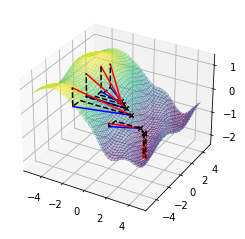

ideal parameters: x=2.1456172713615604, y=-0.0899911840104735


In [28]:
# reworking the previous example to find the minumum with gradient descent

# creating a figure
fig, ax= plt.subplots(subplot_kw={"projection": "3d"})
ax.computed_zorder= False

# plot the surface.
surf.set_zorder(1)
surf= ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False, alpha=0.3)
surf.set_zorder(1)

# iteratively following the gradient
x, y= 0, 0

for _ in range(10):
    dx, dy= plot_pseudo_gradient(x, y)
    x, y= x-dx, y-dy # <----------- this is the only part that changed

plt.show()

print("ideal parameters: x={}, y={}".format(x,y))

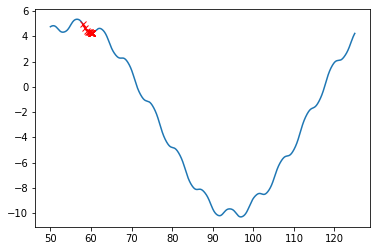

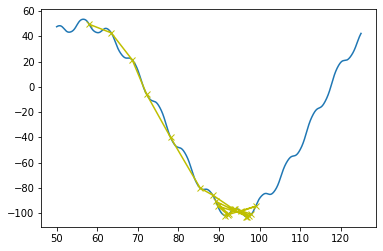

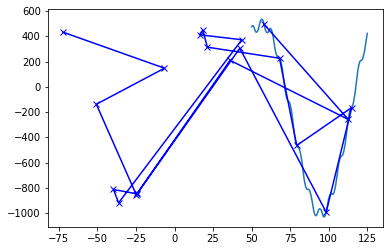

In [30]:
# Plotting 3 similar landscapes scaled vertically to have small, moderate, and large gradients

def f(x, scale):
    """
    Function to represent the landscape we are attempting to optimize
    scaling the function vertically will scale the gradients proportionally
    """
    return scale*(0.3*np.sin(x*0.1) +0.5* np.sin(np.cos(x)) + 0.1*np.sin(x*0.3+2) + 4*np.cos(x*0.1) + 6*np.sin(x*0.05))

def f_slope(x, scale):
    """
    Using a pseudo derivative instead of computing the actual derivative
    """
    dx= 0.00001
    slope= (f(x+dx, scale) - f(x, scale)) / dx
    
    return slope


# defining range
X= np.linspace(50,125,10000)

for gradient_scale, color in zip([1,10,100], ['r', 'y', 'b']):
    # computing landscape
    Y= np.array(list(map(f, X, [gradient_scale]*len(X))))

    point= 58
    explored_x= []
    explored_y= []
    
    for _ in range(20):    
        # marking point as explored
        explored_x.append(point)
        explored_y.append(f(point,gradient_scale))
        
        #traversing along gradient
        point= point-f_slope(point, gradient_scale)

    # plotting landscape
    plt.plot(X,Y)
    # plotting traversal
    plt.plot(explored_x, explored_y, 'x-'+color)
    # rendering
    plt.show()

In [ ]:
# https://towardsdatascience.com/what-are-gradients-and-why-do-they-explode-add23264d24b